In [1]:
import tensorflow as tf
import os

C:\Users\Bhushan Borse\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
os.path.join('data','happy')

'data\\happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
img =cv2.imread(os.path.join('data','happy','1HEoLBLidT2u4mhJ0oiDgig.png'))

In [10]:
img.shape

(800, 1200, 3)

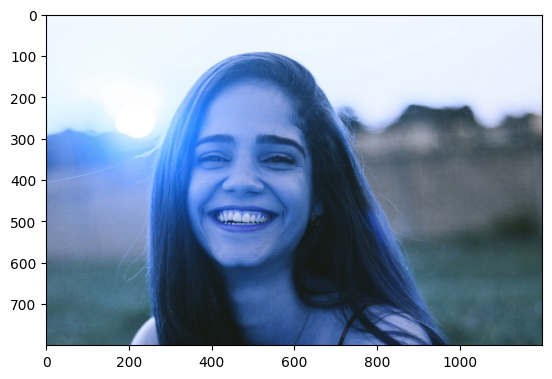

In [11]:
plt.imshow(img)
plt.show()

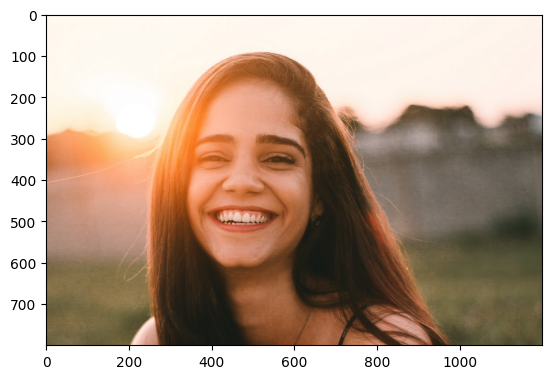

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image{}'.format(image_path))
            #os.remove(image_path)

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 443 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

In [18]:
batch[0].shape

(32, 256, 256, 3)

In [19]:
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

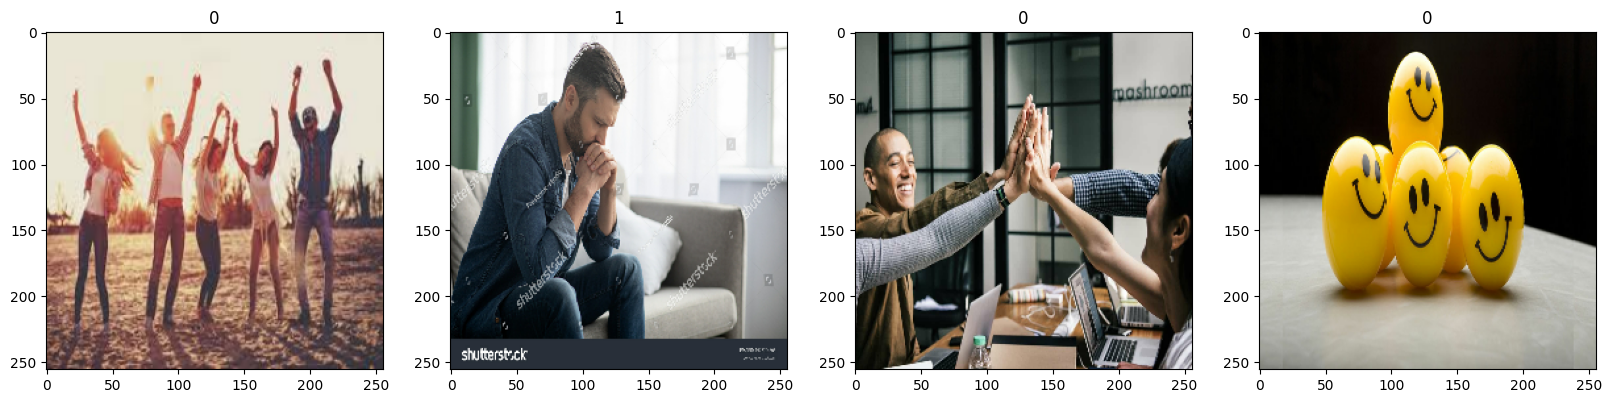

In [20]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
scaled = batch[1] / 255

In [22]:
scaled.max()

0.00392156862745098

In [23]:
data = data.map(lambda x, y: (x/255, y))

In [24]:
scaled_iterator = data.as_numpy_iterator()

In [25]:
batch = scaled_iterator.next()

In [26]:
batch[1].max()

1

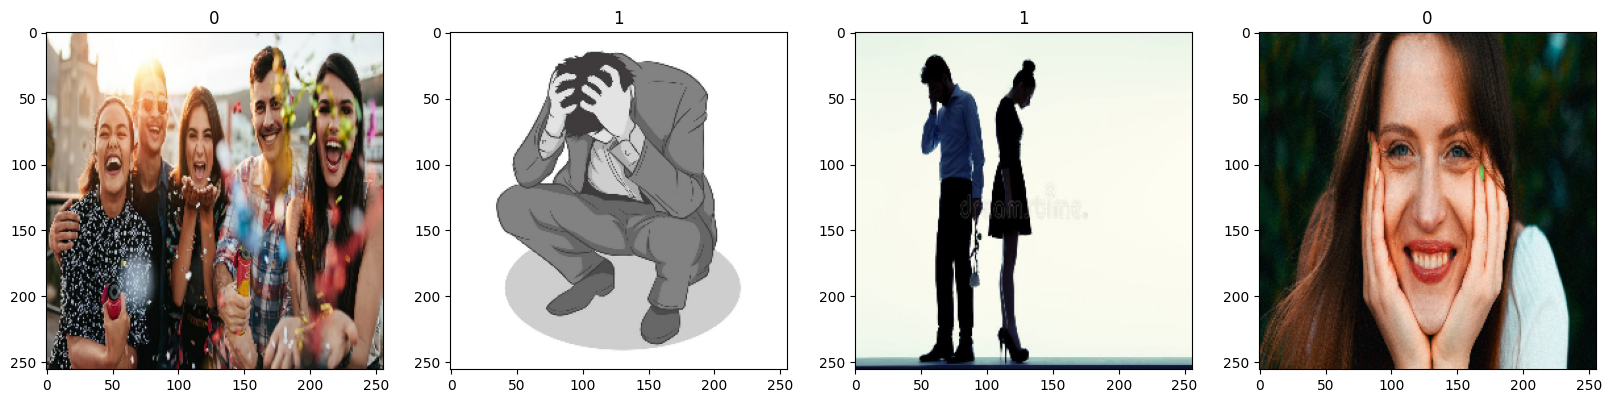

In [27]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
len(data)

14

In [158]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)+1

In [159]:
test_size

2

In [160]:
train_size+val_size+test_size

14

In [161]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [162]:
len(test)

2

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [164]:
model = Sequential()

In [165]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [166]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [168]:
logdir='logs'

In [169]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [170]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy: 0.5039 - loss: 1.0554 - val_accuracy: 0.5156 - val_loss: 0.6930
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.6387 - loss: 0.6544 - val_accuracy: 0.7188 - val_loss: 0.6149
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step - accuracy: 0.6929 - loss: 0.6243 - val_accuracy: 0.6797 - val_loss: 0.5954
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 375ms/step - accuracy: 0.7085 - loss: 0.5532 - val_accuracy: 0.7422 - val_loss: 0.4910
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.7717 - loss: 0.5037 - val_accuracy: 0.7969 - val_loss: 0.4097
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.8347 - loss: 0.3746 - val_accuracy: 0.8438 - val_loss: 0.3749
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.8555 - loss: 0.4073 - val_accuracy: 0.6953 - val_loss: 0.5579
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 0.8147 - loss: 0.4940 - val_accuracy: 0.8672 - val_loss:

In [171]:
hist.history

{'accuracy': [0.49609375,
  0.62890625,
  0.7109375,
  0.71875,
  0.76171875,
  0.83203125,
  0.83984375,
  0.828125,
  0.890625,
  0.90625,
  0.9140625,
  0.93359375,
  0.94921875,
  0.98046875,
  0.9453125,
  0.9609375,
  0.9765625,
  0.984375,
  0.98046875,
  0.99609375],
 'loss': [0.9322333335876465,
  0.653867244720459,
  0.602461040019989,
  0.5266996622085571,
  0.48687365651130676,
  0.39828190207481384,
  0.3921669125556946,
  0.4188012182712555,
  0.31560611724853516,
  0.24363474547863007,
  0.20602765679359436,
  0.1605367213487625,
  0.14451190829277039,
  0.10719052702188492,
  0.1208019107580185,
  0.10976225137710571,
  0.055080194026231766,
  0.0606326088309288,
  0.0806288793683052,
  0.03369653597474098],
 'val_accuracy': [0.515625,
  0.71875,
  0.6796875,
  0.7421875,
  0.796875,
  0.84375,
  0.6953125,
  0.8671875,
  0.90625,
  0.8828125,
  0.9140625,
  0.953125,
  0.8984375,
  0.9375,
  0.96875,
  0.984375,
  0.984375,
  0.984375,
  0.9921875,
  0.9921875],
 'val_

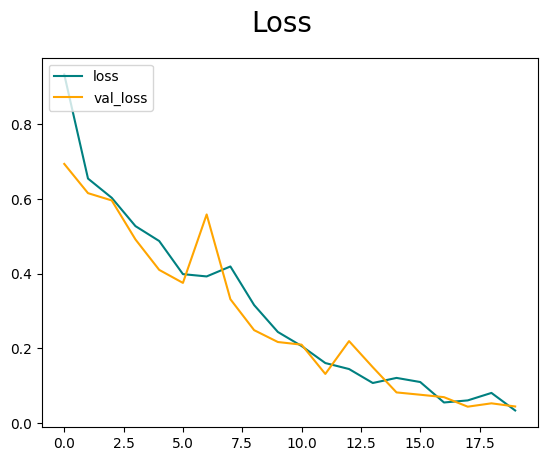

In [172]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

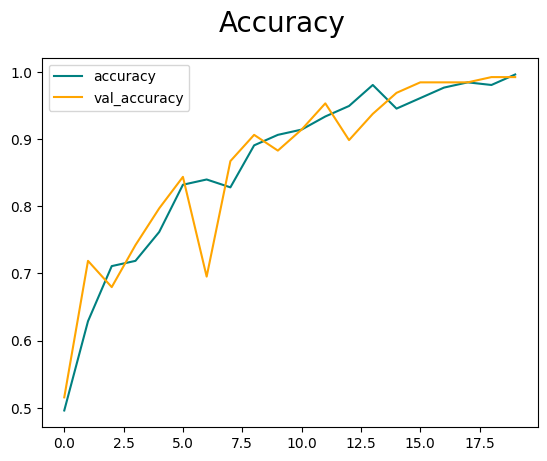

In [173]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)






plt.legend(loc="upper left")
plt.show()

In [174]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [175]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [178]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [179]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.96875, Recall: 0.96875, Accuracy: 0.9661017060279846


In [180]:
import cv2

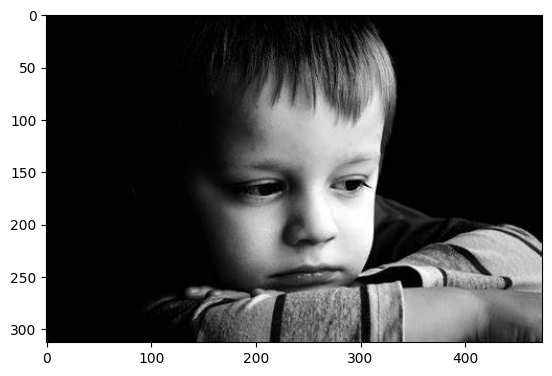

In [196]:
img = cv2.imread('Saaaadd.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

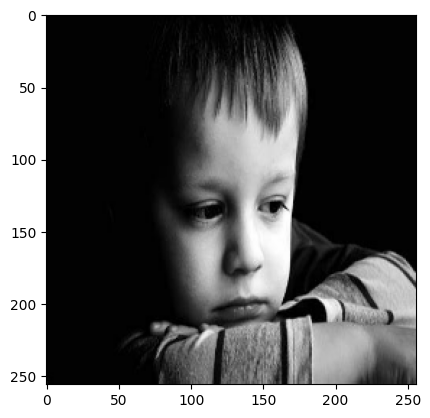

In [197]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [198]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [199]:
yhat

array([[0.9962598]], dtype=float32)

In [200]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [211]:
from tensorflow.keras.models import load_model

In [212]:
model.save(os.path.join('models','imageclassifier.h5'))

In [213]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [214]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [215]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
